In [1]:
import pandas as pd
import os

In [2]:
path_to_pickles = '../data/Pickles'

os.listdir(path_to_pickles)

['df_eolien_norm.pkl',
 'df_temperatures.pkl',
 'df_data_nationales.pkl',
 'df_solaire_norm.pkl']

In [3]:
import pandas as pd

directory = path_to_pickles

df_eolien = pd.read_pickle(directory + '/df_eolien_norm.pkl')
df_solaire = pd.read_pickle(directory + '/df_solaire_norm.pkl')

In [4]:
df_eolien.head()

Périmètre            Auvergne-Rhône-Alpes  Bourgogne-Franche-Comté  Bretagne  \
DateTime                                                                       
2013-01-01 00:30:00              0.719888                 0.588889  0.136829   
2013-01-01 01:00:00              0.719888                 0.583333  0.143223   
2013-01-01 01:30:00              0.691877                 0.577778  0.159847   
2013-01-01 02:00:00              0.683473                 0.572222  0.177749   
2013-01-01 02:30:00              0.686275                 0.555556  0.200767   

Périmètre            Centre-Val de Loire  Grand-Est  Hauts-de-France  \
DateTime                                                               
2013-01-01 00:30:00             0.650448   0.551193         0.662901   
2013-01-01 01:00:00             0.656850   0.553678         0.631391   
2013-01-01 01:30:00             0.670935   0.579523         0.602854   
2013-01-01 02:00:00             0.678617   0.615308         0.565398   
2013-01-01 02:30:00             0.687580   0.619781         0.510702   

Périmètre            Ile-de-France  Normandie  Nouvelle-Aquitaine  Occitanie  \
DateTime                                                                       
2013-01-01 00:30:00       0.842105   0.457627            0.454545   0.418472   
2013-01-01 01:00:00       0.842105   0.402542            0.480519   0.376283   
2013-01-01 01:30:00       0.789474   0.358051            0.441558   0.326112   
2013-01-01 02:00:00       0.789474   0.302966            0.400000   0.269099   
2013-01-01 02:30:00       0.842105   0.286017            0.374026   0.255416   

Périmètre                PACA  Pays-de-la-Loire  
DateTime                                         
2013-01-01 00:30:00  0.266667          0.332724  
2013-01-01 01:00:00  0.311111          0.252285  
2013-01-01 01:30:00  0.400000          0.223035  
2013-01-01 02:00:00  0.444444          0.228519  
2013-01-01 02:30:00  0.533333          0.232176

# Are wind and solar production complementary?

In [5]:
# mean
df_eolien['mean_wind'] = df_eolien.mean(axis=1)
df_solaire['mean_sun'] = df_solaire.mean(axis=1)

In [6]:
# create a separate df for mean data
df_mean = pd.DataFrame(df_eolien['mean_wind'])
df_mean['mean_sun'] = df_solaire['mean_sun']
df_mean.head()

mean_wind  mean_sun
DateTime                                
2013-01-01 00:30:00   0.506857       0.0
2013-01-01 01:00:00   0.496101       0.0
2013-01-01 01:30:00   0.485087       0.0
2013-01-01 02:00:00   0.477273       0.0
2013-01-01 02:30:00   0.481978       0.0

In [7]:
df_mean_D = df_mean.resample('D').mean()

<Axes: xlabel='DateTime', ylabel='mean_wind'>

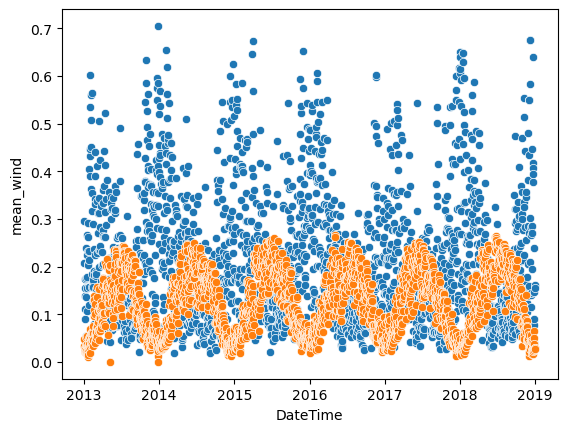

In [8]:
import seaborn as sns

sns.scatterplot(df_mean_D,x='DateTime',y='mean_wind')
sns.scatterplot(df_mean_D,x='DateTime',y='mean_sun')

In [9]:
rolling_window = 200
df_mean_D['smothed_wind'] = df_mean_D.mean_wind.rolling(rolling_window, center=True).mean()
df_mean_D['smothed_sun'] = df_mean_D.mean_sun.rolling(rolling_window, center=True).mean()

In [10]:
df_mean_D.dropna(inplace=True)

<Axes: xlabel='DateTime', ylabel='mean_wind'>

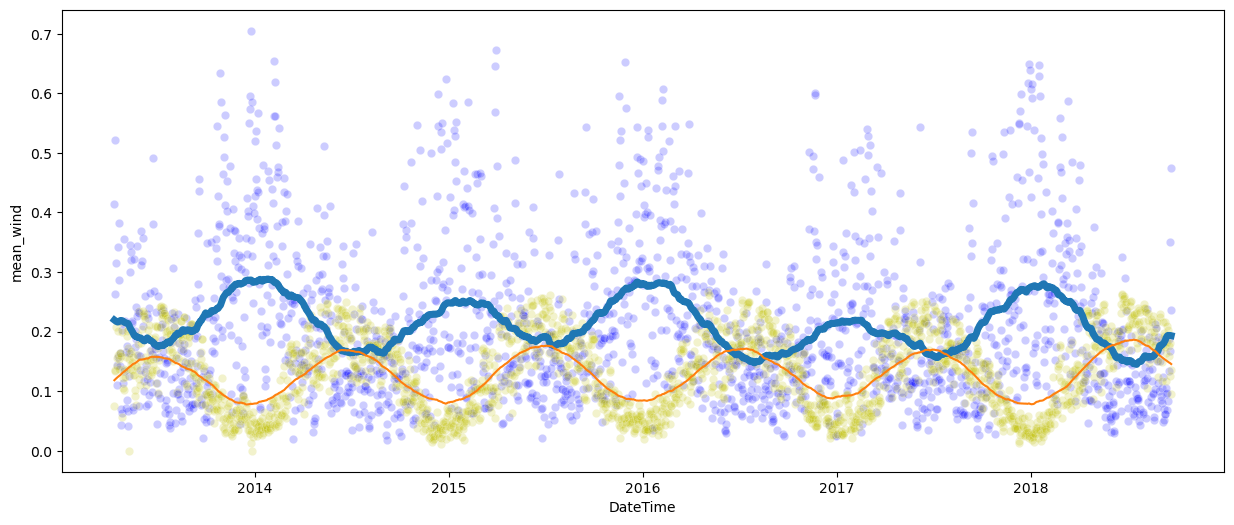

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
sns.scatterplot(df_mean_D,x='DateTime',y='mean_wind',color='b',alpha=0.2)
sns.scatterplot(df_mean_D,x='DateTime',y='mean_sun',color='y',alpha=0.2)
sns.lineplot(df_mean_D,x='DateTime',y='smothed_wind',linewidth=5)
sns.lineplot(df_mean_D,x='DateTime',y='smothed_sun')

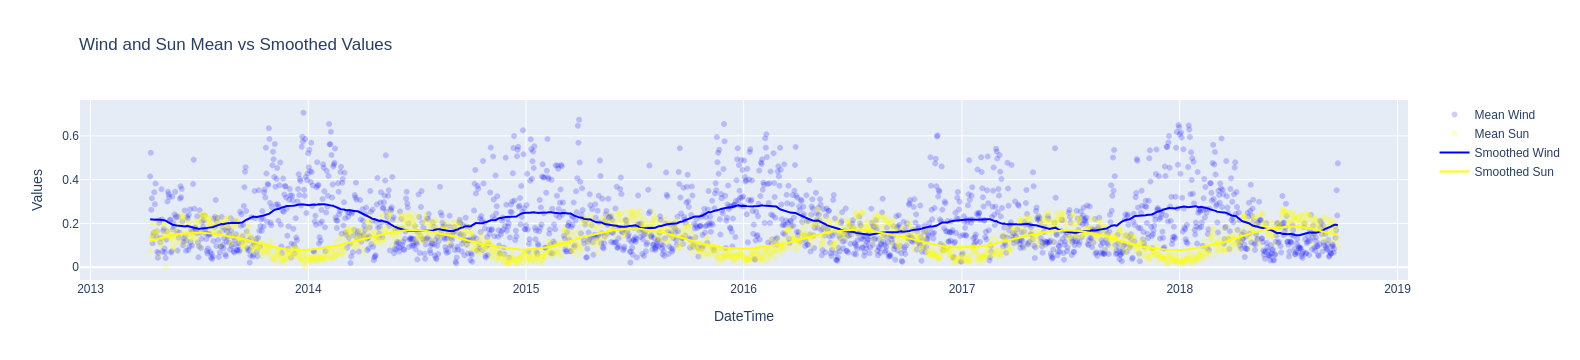

In [12]:
import numpy as np
import plotly.graph_objects as go

# Create scatter and line plots using Plotly
fig = go.Figure()

# Scatter plots
fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['mean_wind'], mode='markers',
                         marker=dict(color='blue', opacity=0.2), name='Mean Wind'))
fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['mean_sun'], mode='markers',
                         marker=dict(color='yellow', opacity=0.2), name='Mean Sun'))

# Line plots
fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['smothed_wind'], mode='lines',
                         line=dict(color='blue'), name='Smoothed Wind'))
fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['smothed_sun'], mode='lines',
                         line=dict(color='yellow'), name='Smoothed Sun'))

# Update layout
fig.update_layout(title='Wind and Sun Mean vs Smoothed Values',
                  xaxis_title='DateTime',
                  yaxis_title='Values')

# Display the figure
fig.show()

In [13]:
xaxis = dict(
    tickfont_size = 30,
    title='',
    side='left',
    showgrid=False,
    showline=True,
    linecolor='black',
    gridcolor='grey',
    linewidth=2,
    ticks='',
    griddash='dot',
    mirror=True,
    zeroline=False,
    type='date',
    dtick="M12",
    range=['2013-10-28 00:00:00','2018-03-10 00:00:00']
    
    # ticktext=['\U0001F62D', '\U0001F622', '\U0001F610', '\U0001F604', '\U0001F60A']
)

yaxis = dict(
    title='',
    title_font_size=17,
    showgrid=False,
    showline=True,
    linecolor='black',
    gridcolor='grey',
    griddash='dot',
    linewidth=2,
    mirror=True,
    ticks='',
    zeroline=False,
    showticklabels=False
    # range= [0,150]
)

In [14]:
from datetime import datetime, timedelta

def generate_season_limits(start_year, end_year):
    season_limits = []
    
    for year in range(start_year, end_year + 1):
        spring_start = datetime(year, 3, 20)
        spring_end = datetime(year, 6, 20)
        summer_start = datetime(year, 3, 20)
        summer_end = datetime(year, 9, 22)
        fall_start = datetime(year, 9, 23)
        fall_end = datetime(year, 12, 20)
        winter_start = datetime(year, 12, 21)
        winter_end = datetime(year + 1, 3, 19)
        
        season_limits.append({
            "year": year,
            "spring": (spring_start, spring_end),
            "summer": (summer_start, summer_end),
            "fall": (fall_start, fall_end),
            "winter": (winter_start, winter_end)
        })
    
    return season_limits

In [15]:
def generate_warm_cold_periods(start_year, end_year):
    period_limits = []
    
    for year in range(start_year, end_year + 1):
        # Warm period (mid-spring to mid-autumn)
        warm_start = datetime(year, 5, 1)
        warm_end = datetime(year, 10, 31)
        
        # Cold period (rest of the year)
        cold_start = datetime(year, 11, 1)
        cold_end = datetime(year+1, 4, 30)
        
        period_limits.append({
            "year": year,
            "warm": (warm_start, warm_end),
            "cold":(cold_start, cold_end)
        })
    
    return period_limits

In [16]:
periods = generate_warm_cold_periods(2012, 2020)

In [17]:
import geopandas as gpd

regions_gdf = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/regions.geojson")

selected_regions = [

    "Auvergne-Rhône-Alpes", "Bourgogne-Franche-Comté", "Bretagne", "Centre-Val de Loire",

    "Grand Est", "Hauts-de-France", "Île-de-France", "Normandie",

    "Nouvelle-Aquitaine", "Occitanie", "Provence-Alpes-Côte d'Azur", "Pays de la Loire"

]

selected_gdf = regions_gdf[regions_gdf['nom'].isin(selected_regions)]

In [18]:
df_eolien_D = df_eolien.resample('D').mean()
df_eolien_D = df_eolien_D.drop('mean_wind',axis=1)

df_solaire_D = df_solaire.resample('D').mean()
df_solaire_D = df_solaire_D.drop('mean_sun',axis=1)

In [19]:
df_eolien_D.mean()

Périmètre
Auvergne-Rhône-Alpes       0.228031
Bourgogne-Franche-Comté    0.188475
Bretagne                   0.198022
Centre-Val de Loire        0.221207
Grand-Est                  0.207196
Hauts-de-France            0.212151
Ile-de-France              0.180430
Normandie                  0.223293
Nouvelle-Aquitaine         0.186131
Occitanie                  0.259808
PACA                       0.255991
Pays-de-la-Loire           0.204107
dtype: float64

In [20]:
df_nat = pd.DataFrame(pd.read_pickle('../data/Pickles/df_data_nationales.pkl'))
conso_nat = pd.DataFrame(df_nat['Consommation'].dropna(axis=0).resample('h').mean())
df_temp = pd.DataFrame(pd.read_pickle('../data/Pickles/df_temperatures.pkl'))
avg_temp_nat = pd.DataFrame(df_temp.mean(axis=1).dropna(axis=0).resample('h').mean(), columns=['avg_temperature'])
merged = conso_nat.merge(avg_temp_nat, how='inner', left_index=True, right_index=True)
merged_D = merged.resample('D').mean()
merged_D['mois'] = merged_D.index.month
merged_D['saison'] = (merged_D.mois - 1) // 3 + 1

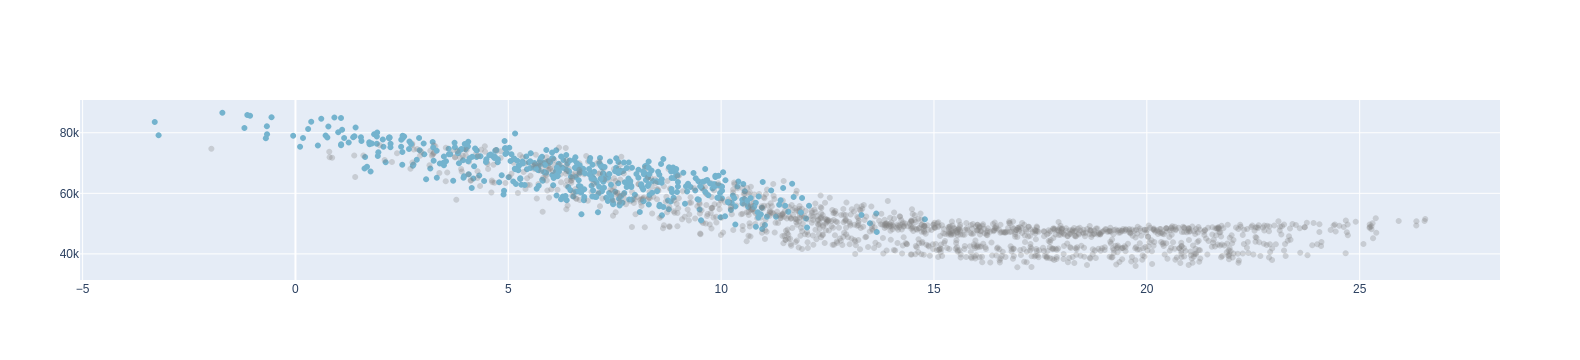

In [21]:
fig = go.Figure()

# Ajouter les traces pour chaque catégorie dans le slider
#A1CDA8
#71cbbe
#9F9FED
#60b5f1
category_to_season = {1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'}
season_colors = {
    'Hiver': '#74b3ce',  #'blue', #'#A1CDA8',
    'Printemps': '#1eae38',  #'green', #'#71cbbe',
    'Été': '#ffb400',  #'yellow', #'#9F9FED',
    'Automne': '#d84a05' #'red', #'#60b5f1'
}
merged_D['season'] = merged_D['saison'].map(category_to_season)
unique_categories = merged_D['season'].unique()

for season in unique_categories:
    # Trace pour les points de la catégorie en couleur
    fig.add_trace(go.Scatter(
        x=merged_D['avg_temperature'],
        y=merged_D['Consommation'],
        mode='markers',
        marker=dict(
            color=['gray' if s != season else season_colors[season] for s in merged_D['season']],
            opacity=[0.3 if s != season else 1 for s in merged_D['season']]
        ),
        name=season, 
        visible=False  # Rendre cette trace invisible par défaut
    ))

# Activer seulement la première trace initialement
fig.data[0].visible = True

# Créer les étapes du slider
steps = []
for i, season in enumerate(unique_categories):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}],  # Rendre toutes les traces invisibles
        label=season #['Hiver', 'Printemps', 'Eté', 'Automne']  # f"Catégorie {category}",
    )
    # Rendre la trace correspondant à la catégorie active visible
    step["args"][0]["visible"][i] = True
    steps.append(step)
fig.show()

In [22]:
irectory = path_to_pickles

df_data_nationales = pd.read_pickle(directory + '/df_data_nationales.pkl')

df_data_nationales_month = df_data_nationales.groupby(by=df_data_nationales.index.month.rename('mois')).mean()

df_month_nucleaire = df_data_nationales_month['Nucléaire']
df_month_green = df_data_nationales_month[['Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']].sum(axis = 1)
df_month_fossils = df_data_nationales_month[['Fioul', 'Charbon', 'Gaz']].sum(axis = 1)

# fig = px.line(x=["janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"], y=("df_nucleaire_month", "df_month_fossils"), title="sample figure")

months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]

df_month_nucleaire_percent = (100 / df_data_nationales_month.drop("Consommation", axis = 1).sum(axis=1))*df_month_nucleaire
df_month_green_percent = (100 / df_data_nationales_month.drop("Consommation", axis = 1).sum(axis=1))*df_month_green
df_month_fossils_percent = (100 / df_data_nationales_month.drop("Consommation", axis = 1).sum(axis=1))*df_month_fossils

# Création des traces
trace_nucleaire = go.Scatter(
    x=months,
    y=df_month_nucleaire_percent,
    mode='lines',
    name='Nucléaire',
    line=dict(color='orange',width=5),
    
)

trace_green = go.Scatter(
    x=months,
    y=df_month_green_percent,
    mode='lines',
    name='Vert',
    line=dict(color='green',width=5)
)

trace_fossils = go.Scatter(
    x=months,
    y=df_month_fossils_percent,
    mode='lines',
    name='Fossiles',
    line=dict(color='black',width=5)
)

In [23]:
import dash
from dash import dcc, html
import plotly.express as px


app = dash.Dash(__name__)


fig = go.Figure()

for season_data in periods:
    for season, period in season_data.items():
        if season == 'year':  # Skip the 'year' field
            continue
        
        start, end = period
        color = {
            'warm': '#A1CDA8',  
            'cold': '#9F9FED',   

        }[season]


        fig.add_shape(type="rect",
                      x0=start, x1=end, y0=0, y1=1, xref='x', yref='paper',
                      fillcolor=color, opacity=0.1, layer="below", line_width=0,name='period')


fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['mean_wind'], mode='markers',
                         marker=dict(color='#0072B2', opacity=0.1),name='Wind energy'))
fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['mean_sun'], mode='markers',
                         marker=dict(color='#E69F00', opacity=0.1),name='Solar energy'))


fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['smothed_wind'], mode='lines',
                         line=dict(color='#0072B2',width=5), name='Average Wind production'))
fig.add_trace(go.Scatter(x=df_mean_D.index, y=df_mean_D['smothed_sun'], mode='lines',
                         line=dict(color='#E69F00',width=5), name='Average Solar production'))



fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                         marker=dict(color='#A1CDA8',size=15), 
                         showlegend=True, name='Warm Period'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                         marker=dict(color='#9F9FED',size=15), 
                         showlegend=True, name='Cold Period'))

fig2 = px.choropleth_mapbox(
    selected_gdf,
    geojson=selected_gdf.__geo_interface__,  # Use the GeoDataFrame's GeoJSON representation
    locations='nom',  # Column in the data to match with the geojson feature names
    featureidkey="properties.nom", 
    color_continuous_scale="Viridis",  # Color scale for the map
    color = df_eolien_D.mean(),
    mapbox_style="carto-positron",
    center={"lat": 46.603354, "lon": 1.888334},  # Center of France
    zoom=4,
    opacity=0.6,
    labels={'value': 'Region Value'}  # Label for the color bar
)

fig4 = px.choropleth_mapbox(
    selected_gdf,
    geojson=selected_gdf.__geo_interface__,  # Use the GeoDataFrame's GeoJSON representation
    locations='nom',  # Column in the data to match with the geojson feature names
    featureidkey="properties.nom", 
    color_continuous_scale="Viridis",  # Color scale for the map
    color = df_solaire_D.mean(),
    mapbox_style="carto-positron",
    center={"lat": 46.603354, "lon": 1.888334},  # Center of France
    zoom=4,
    opacity=0.6,
    labels={'value': 'Region Value'}  # Label for the color bar
)

fig3= go.Figure()

# Ajouter les traces pour chaque catégorie dans le slider
#A1CDA8
#71cbbe
#9F9FED
#60b5f1
category_to_season = {1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'}
season_colors = {
    'Hiver': '#74b3ce',  #'blue', #'#A1CDA8',
    'Printemps': '#1eae38',  #'green', #'#71cbbe',
    'Été': '#ffb400',  #'yellow', #'#9F9FED',
    'Automne': '#d84a05' #'red', #'#60b5f1'
}
merged_D['season'] = merged_D['saison'].map(category_to_season)
unique_categories = merged_D['season'].unique()

for season in unique_categories:
    # Trace pour les points de la catégorie en couleur
    fig3.add_trace(go.Scatter(
        x=merged_D['avg_temperature'],
        y=merged_D['Consommation'],
        mode='markers',
        marker=dict(
            color=['gray' if s != season else season_colors[season] for s in merged_D['season']],
            opacity=[0.3 if s != season else 1 for s in merged_D['season']]
        ),
        name=season, 
        visible=False  # Rendre cette trace invisible par défaut
    ))

# Activer seulement la première trace initialement
fig3.data[0].visible = True

# Créer les étapes du slider
steps = []
for i, season in enumerate(unique_categories):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}],  # Rendre toutes les traces invisibles
        label=season #['Hiver', 'Printemps', 'Eté', 'Automne']  # f"Catégorie {category}",
    )
    # Rendre la trace correspondant à la catégorie active visible
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Catégorie : "},
    pad={"t": 50},
    steps=steps
)]

fig5 = go.Figure()
fig5.add_trace(trace_nucleaire)
fig5.add_trace(trace_green)
fig5.add_trace(trace_fossils)

# Ajouter des fonds de couleur différente pour chaque groupe de mois
fig5.add_shape(type="rect",
    xref="x", yref="paper",
    x0="Janvier", y0=0,
    x1="Avril", y1=1,
    fillcolor="#9F9FED",
    opacity=0.2,
    layer="below",
    line_width=0,
)

fig5.add_shape(type="rect",
    xref="x", yref="paper",
    x0="Avril", y0=0,
    x1="Juillet", y1=1,
    fillcolor="#A1CDA8",
    opacity=0.2,
    layer="below",
    line_width=0,
)

fig5.add_shape(type="rect",
    xref="x", yref="paper",
    x0="Juillet", y0=0,
    x1="Octobre", y1=1,
    fillcolor="#A1CDA8",
    opacity=0.2,
    layer="below",
    line_width=0,
)

fig5.add_shape(type="rect",
    xref="x", yref="paper",
    x0="Octobre", y0=0,
    x1="Décembre", y1=1,
    fillcolor="#9F9FED",
    opacity=0.2,
    layer="below",
    line_width=0,
)

fig5.update_layout(
    title='Évolution des énergies par mois de 2012 à 2018',
    xaxis_title='Mois',
    yaxis_title='Production en %',
    legend_title='Type d\'énergie'
)

# Update layout
fig.update_layout(title='Wind and Solar production are complementary.',
                  xaxis = xaxis,
                  yaxis = yaxis)

fig3.update_layout(
    title="Evolution de la consommation en france selon la température moyenne",
    xaxis_title="Température moyenne (en °C) (à l'extérieur...)",
    yaxis_title="Consommation moyenne (en MW)",
    height = 800,
    width = 1200,
    legend_title="Saisons",
    plot_bgcolor='white',
    xaxis = dict(
        gridcolor = 'lightgray',
        zerolinecolor = 'lightblue'
    ),
    yaxis = dict(
        gridcolor = 'lightgray'
    ),
    sliders=sliders
)

fig2.update_layout(
    title = 'Windy in Occitanie and Auvergne-Rhône-Alpes',
    mapbox=dict(
        zoom=4.1,
        center={"lat": 46.603354, "lon": 1.888334},  # Center of France
        uirevision='fixed',
        # bounds={"west": -5.0, "east": 9.0, "south": 41.0, "north": 51.0},
    ),
    dragmode=False,
    # margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig4.update_layout(
    title = 'Sunny in Auvergne-Rhône-Alpes',
    mapbox=dict(
        zoom=4.1,
        center={"lat": 46.603354, "lon": 1.888334},  # Center of France
        uirevision='fixed',
        # bounds={"west": -5.0, "east": 9.0, "south": 41.0, "north": 51.0},
    ),
    dragmode=False,
    # margin={"r": 0, "t": 0, "l": 0, "b": 0}
)



# Layout for the Dash app with both figures side by side
app.layout = html.Div(children=[
    html.H1(children='Energy in France'),

    html.Div([
        dcc.Graph(
            id='wind-sun-graph',
            figure=fig,
            style={'width': '60%', 'display': 'inline-block'}
        ),
        dcc.Graph(
            id='choropleth-map',
            figure=fig2,
            style={'width': '38%', 'display': 'inline-block'}
        )
    ]),
    html.Div([
        dcc.Graph(
            id='cons_temp',
            figure=fig3,
            style={'width': '60%', 'display': 'inline-block'}
        ),
        dcc.Graph(
            id='solar_map',
            figure=fig4,
            style={'width': '38%', 'display': 'inline-block','float': 'right',  # Move the graph to the upper-right corner
                'margin-right': '2%',  # Add some margin on the right for better spacing
                'margin-top': '0'}
        )
    ]),
    html.Div([
        dcc.Graph(
            id='other_energy',
            figure=fig5,
            style={'width': '60%', 'display': 'inline-block'}
        )
    ])
])
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [24]:
# def pic_location(location)